<a href="https://colab.research.google.com/github/derekedgar23/Misc.-Data-Projects/blob/main/Claims_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**P&C Insurance Claims- Exploratory Data Analysis**

- Dataset from Kaggle: https://www.kaggle.com/datasets/buntyshah/auto-insurance-claims-data?resource=download

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from google.colab import drive
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder


In [3]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/insurance_claims.csv'


Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/insurance_claims.csv')

In [5]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
na_count = df.isna().sum()
na_count

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


## Set visualization styles

In [8]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100
%matplotlib inline

## Preprocessing Data

In [9]:
# Convert date columns to datetime

df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

In [10]:
# Calculate policy age at incident in days

df['policy_age'] = (df['incident_date'] - df['policy_bind_date']).dt.days


In [11]:
# Create better label for fraud

df['fraud'] = df['fraud_reported'].map({'Y': 'Fraud', 'N': 'No Fraud'})


## Exploratory Data Analysis

- Visualazation of Claims Data

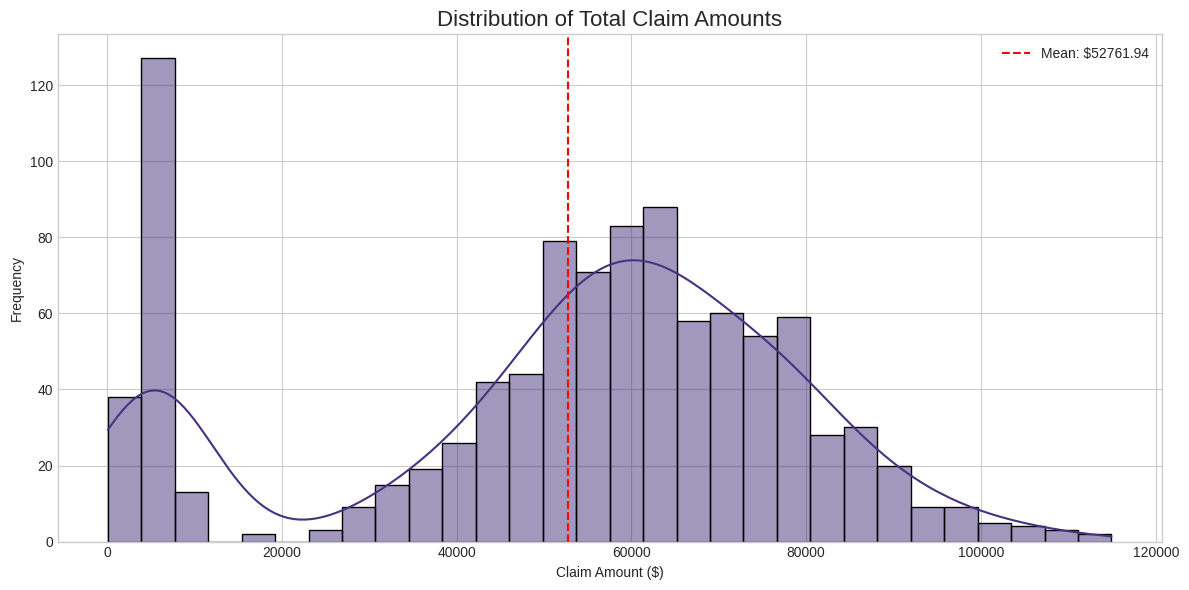

In [12]:
# Total Claims Amounts

plt.figure(figsize=(12, 6))
sns.histplot(df['total_claim_amount'], kde=True, bins=30)
plt.title('Distribution of Total Claim Amounts', fontsize=16)
plt.xlabel('Claim Amount ($)')
plt.ylabel('Frequency')
plt.axvline(df['total_claim_amount'].mean(), color='red', linestyle='--',
            label=f'Mean: ${df["total_claim_amount"].mean():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
# Breakdown of Claims totals

claim_components = df[['injury_claim', 'property_claim', 'vehicle_claim']].copy()
claim_means = claim_components.mean().reset_index()
claim_means.columns = ['Claim Type', 'Average Amount']


<ipython-input-14-2e8954398b4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Claim Type', y='Average Amount', data=claim_means, palette='viridis')


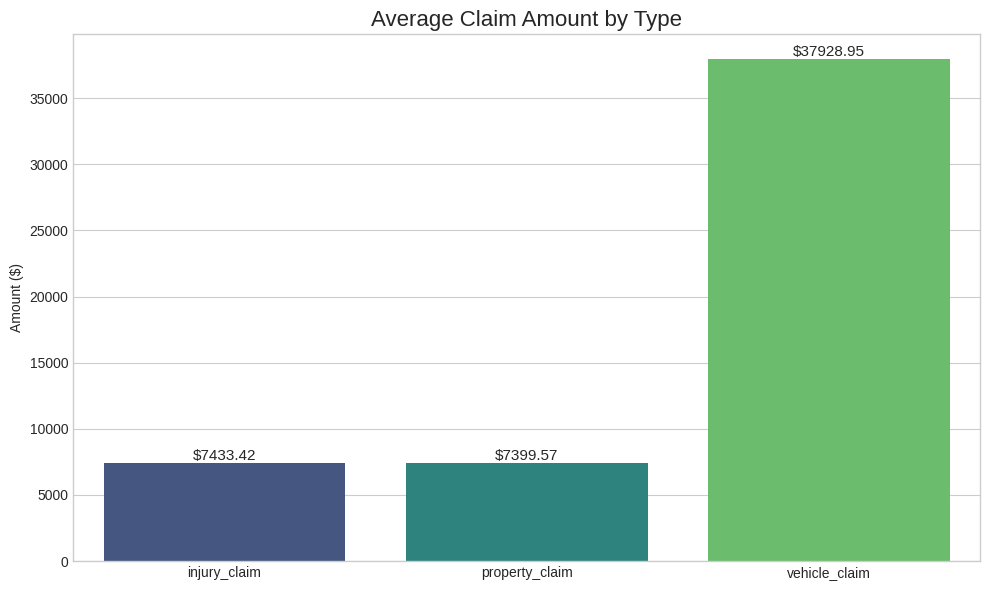

In [14]:
# Plot Claims Breakdown
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='Claim Type', y='Average Amount', data=claim_means, palette='viridis')
plt.title('Average Claim Amount by Type', fontsize=16)
plt.ylabel('Amount ($)')
plt.xlabel('')
# Add value labels
for bar in bars.patches:
    bars.annotate(f'${bar.get_height():.2f}',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom', fontsize=11)
plt.tight_layout()
plt.show()


<ipython-input-15-9ebbe9695e1f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Incident Type', y='Count', data=incident_counts, palette='viridis')


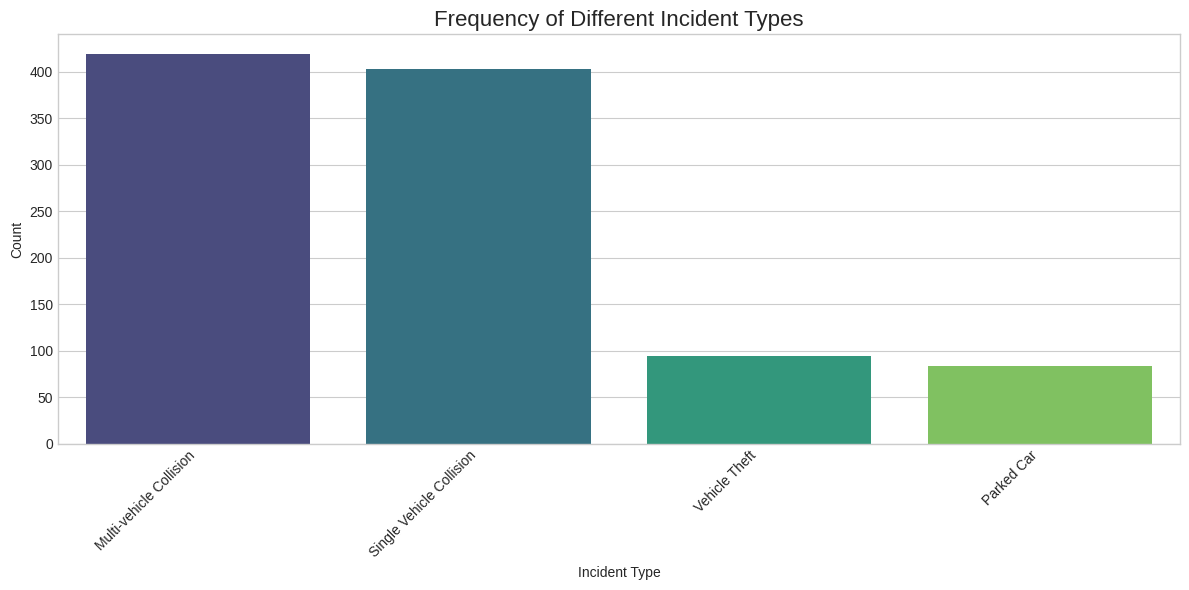

In [15]:
# Incident Analysis: Types

plt.figure(figsize=(12, 6))
incident_counts = df['incident_type'].value_counts().reset_index()
incident_counts.columns = ['Incident Type', 'Count']

sns.barplot(x='Incident Type', y='Count', data=incident_counts, palette='viridis')
plt.title('Frequency of Different Incident Types', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

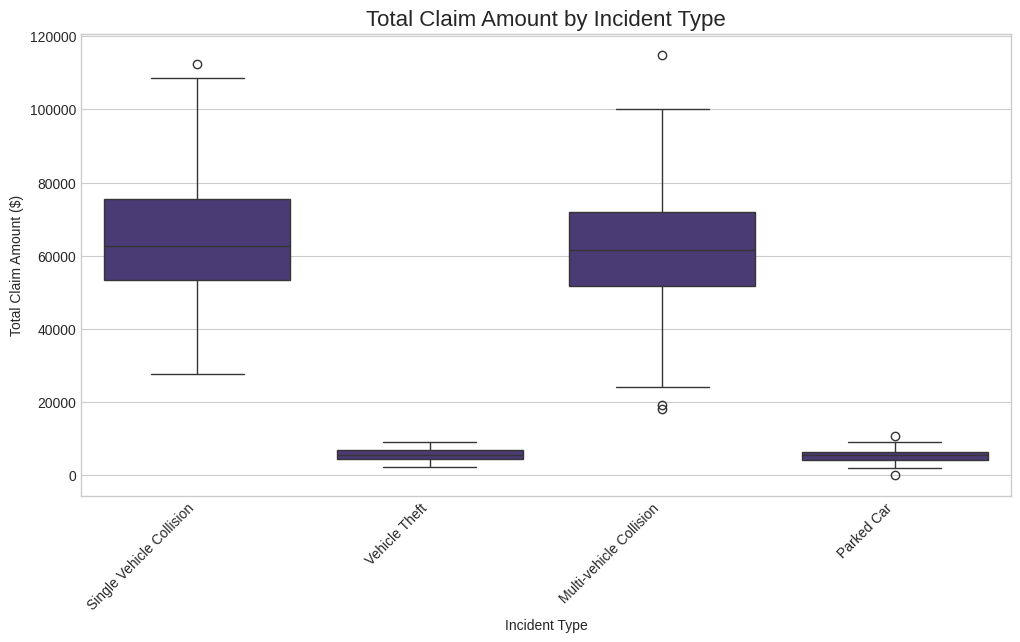

In [16]:
# Claim amounts by incident type

plt.figure(figsize=(12, 6))
sns.boxplot(x='incident_type', y='total_claim_amount', data=df)
plt.title('Total Claim Amount by Incident Type', fontsize=16)
plt.xlabel('Incident Type')
plt.ylabel('Total Claim Amount ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [17]:
# Average claim by incident type

avg_claim_by_incident = df.groupby('incident_type')['total_claim_amount'].mean().round(2).sort_values(ascending=False)
avg_claim_by_incident


,total_claim_amount
incident_type,
Single Vehicle Collision,64445.46
Multi-vehicle Collision,61637.02
Vehicle Theft,5517.23
Parked Car,5308.21


In [30]:
# Most expensive incident types

print(avg_claim_by_incident)


incident_type
Single Vehicle Collision    64445.46
Multi-vehicle Collision     61637.02
Vehicle Theft                5517.23
Parked Car                   5308.21
Name: total_claim_amount, dtype: float64


## Correlation

In [18]:
# Correlation between Age, Customer Tenure, and Claim Amount

correlation_cols = ['age', 'months_as_customer', 'policy_annual_premium',
                    'total_claim_amount', 'policy_age']
corr = df[correlation_cols].corr()
corr


,age,months_as_customer,policy_annual_premium,total_claim_amount,policy_age
age,1.000000,0.922098,0.014404,0.069863,0.036742
months_as_customer,0.922098,1.000000,0.005018,0.062108,0.047927
policy_annual_premium,0.014404,0.005018,1.000000,0.009094,-0.001208
total_claim_amount,0.069863,0.062108,0.009094,1.000000,-0.000793
policy_age,0.036742,0.047927,-0.001208,-0.000793,1.000000


## Correlation findings:

1. Strong correlation(0.922) beteween age and the months as a customer

2. Weak positive correlation (0.070) between age and total_claim_amount:

3. Weak positive correlation (0.062) between months_as_customer and total_claim_amount

4. Very weak correlation (0.009) between policy_annual_premium and total_claim_amount

5. Near-zero correlation (-0.001) between policy_age and total_claim_amount

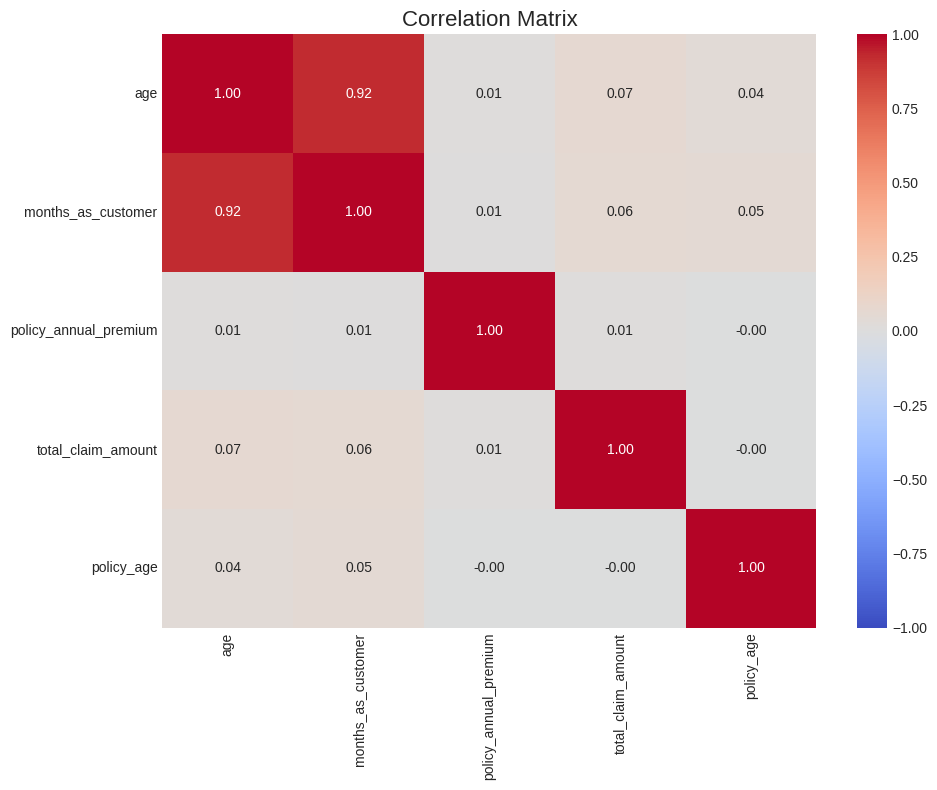

In [19]:
# Correlation Matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

## Fraud Analysis

Text(0.5, 1.0, 'Fraud Distribution')

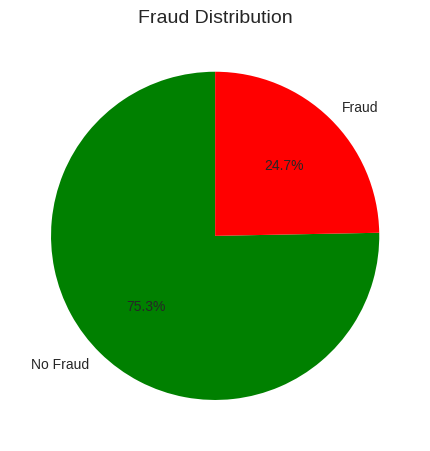

In [20]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
fraud_counts = df['fraud'].value_counts()
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=90,
        colors=['green', 'red'])
plt.title('Fraud Distribution', fontsize=14)

<ipython-input-21-ddd2b73849dd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fraud', y='total_claim_amount', data=df,


Text(0, 0.5, 'Total Claim Amount ($)')

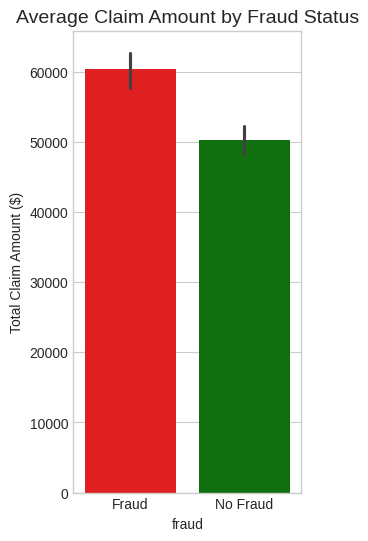

In [21]:
plt.subplot(1, 3, 2)
sns.barplot(x='fraud', y='total_claim_amount', data=df,
            palette={'Fraud': 'red', 'No Fraud': 'green'})
plt.title('Average Claim Amount by Fraud Status', fontsize=14)
plt.ylabel('Total Claim Amount ($)')


## Demographics: Claims:

Text(0.5, 1.0, 'Gender Distribution')

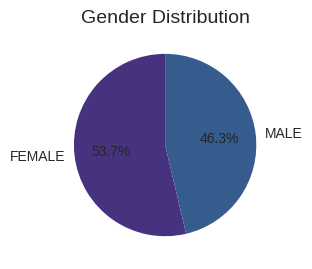

In [22]:
# Gender

plt.subplot(1, 3, 1)
gender_counts = df['insured_sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution', fontsize=14)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'JD'),
  Text(1, 0, 'High School'),
  Text(2, 0, 'Associate'),
  Text(3, 0, 'MD'),
  Text(4, 0, 'Masters'),
  Text(5, 0, 'PhD'),
  Text(6, 0, 'College')])

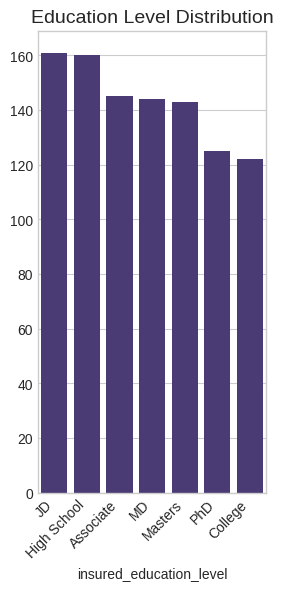

In [23]:
# Insured Education Level

plt.subplot(1, 3, 2)
edu_counts = df['insured_education_level'].value_counts()
sns.barplot(x=edu_counts.index, y=edu_counts.values)
plt.title('Education Level Distribution', fontsize=14)
plt.xticks(rotation=45, ha='right')

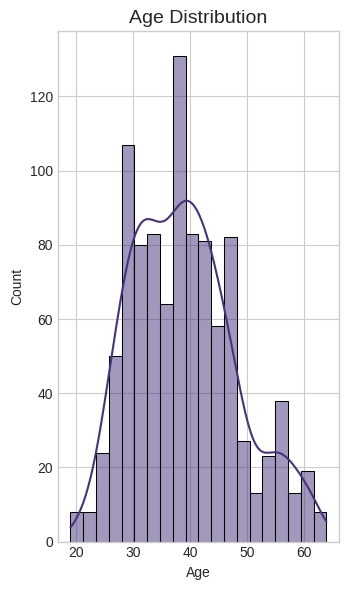

In [26]:
plt.subplot(1, 3, 3)
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age')
plt.tight_layout()
plt.show()

## Vehicle Analysis

Text(0, 0.5, 'Average Claim Amount ($)')

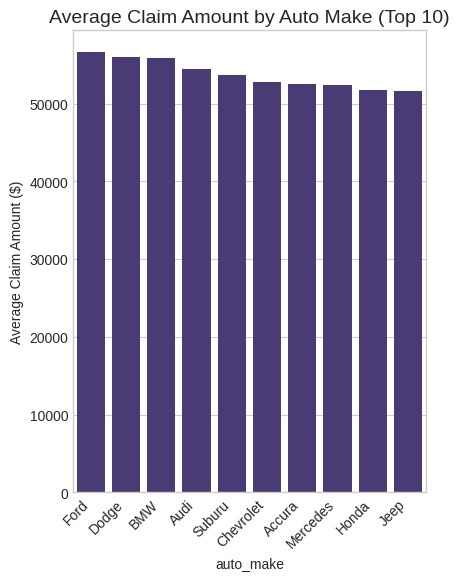

In [27]:
# Average Claims by Vehicle Make

plt.subplot(1, 2, 1)
make_claims = df.groupby('auto_make')['total_claim_amount'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=make_claims.index, y=make_claims.values)
plt.title('Average Claim Amount by Auto Make (Top 10)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Claim Amount ($)')


<ipython-input-28-b6e9c27ea787>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_claims = df.groupby('auto_year_group')['total_claim_amount'].mean()


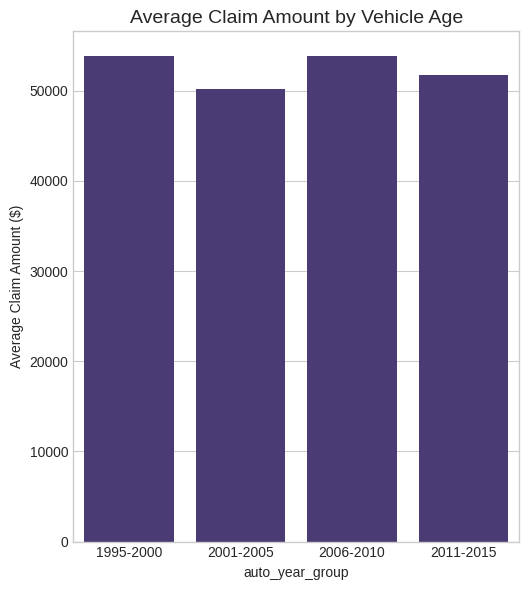

In [28]:
# Average Claims by Vehicle Year

plt.subplot(1, 2, 2)
df['auto_year_group'] = pd.cut(df['auto_year'],
                              bins=[1995, 2000, 2005, 2010, 2015],
                              labels=['1995-2000', '2001-2005', '2006-2010', '2011-2015'])
year_claims = df.groupby('auto_year_group')['total_claim_amount'].mean()
sns.barplot(x=year_claims.index, y=year_claims.values)
plt.title('Average Claim Amount by Vehicle Age', fontsize=14)
plt.ylabel('Average Claim Amount ($)')

plt.tight_layout()
plt.show()

## Predictive Model: Claim Amount

In [32]:
# features

features = ['age', 'months_as_customer', 'policy_deductable', 'policy_annual_premium',
            'umbrella_limit', 'insured_education_level', 'incident_severity',
            'number_of_vehicles_involved', 'bodily_injuries', 'witnesses']

In [33]:
# prepare x and y

X = df[features].copy()
y = df['total_claim_amount']

In [34]:
# Categorical Variables

cat_features = ['insured_education_level', 'incident_severity']
num_features = list(set(features) - set(cat_features))

In [35]:
# Handle Categorical Features

X_encoded = pd.get_dummies(X, columns=cat_features, drop_first=True)


In [36]:
# Split data

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [38]:
# Train model

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
# make predictions

y_pred = model.predict(X_test)


In [40]:
# evaulate model

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [45]:
# Model peformance

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"r2_score: {r2:.2f}")

Mean Absolute Error: 13827.46
Root Mean Squared Error: 18069.62
r2_score: 0.51


In [47]:
# Calculate feature performance

feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

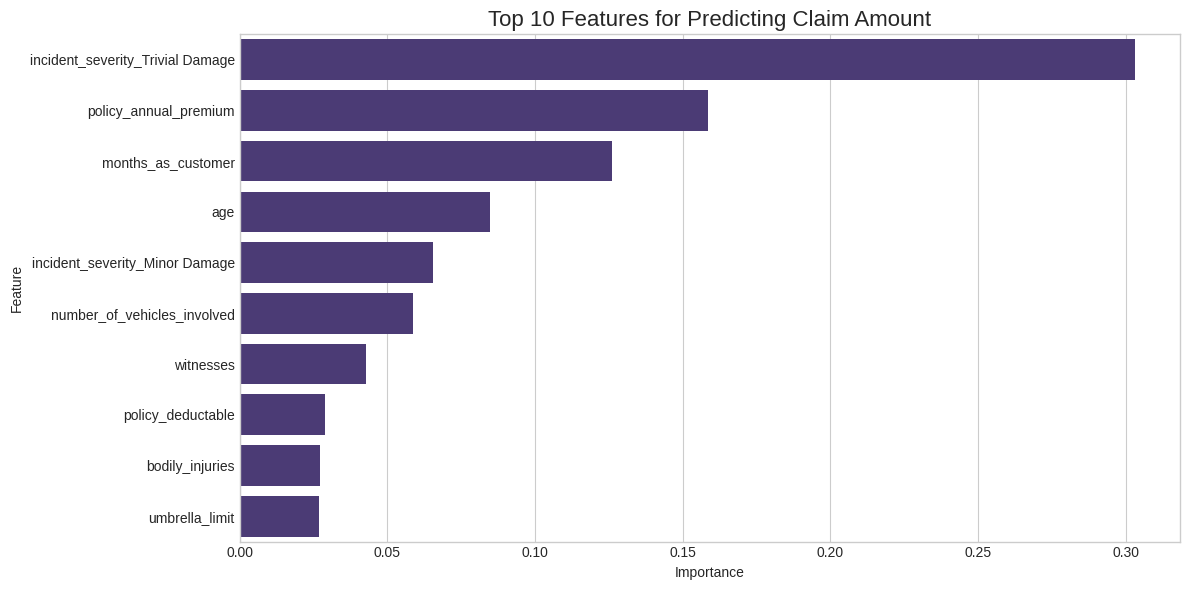

In [48]:
# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Features for Predicting Claim Amount', fontsize=16)
plt.tight_layout()
plt.show()


## Evaluate Model Peformance

1. Mean Absloute Error: $13,827.46

* This represents about 26.2% of the
average claim amount of $52,761.94

* Predictions are off by about a quarter of the typical average claim value

2. Root Mean Squared Error: $18,069.62

* This is 34.2% of the average claim amount

* The difference between RMSE and MAE indicates some predictions have substantially larger errors

3. R² Score: 0.51

* The model explains 51% of the variation in claim amounts

* This level of accuracy is reasonable for insurance claim prediction, especially given the inherent variability in claim amounts. The model provides meaningful predictive value while having clear room for improvement.


# Final Thoughts:

- Model is potentially useful for decision making, and will have opportunities for enhancement in the future.